# <font color = red>Total mark: 4.5/5</font>

Names of group members: -0.5

In [2]:
import numpy as np
import matplotlib.pyplot as plt

1. Let consider the following ODE

$$
\begin{cases}
-k\dfrac{d^2u}{dx^2} + u &= &g(x), \quad \text{ on } [0,2]\\[0.3cm]
u(0) =\alpha\\
u(2) =\beta
\end{cases}
$$

The discretize for of the above equation is given by

$$
\begin{cases}
-\dfrac{k}{h^2}(u_{i-1}-2u_i+u_{i+1})+u_i &= & g(x_i), \quad i = 1,\cdots,N-1\\[0.3cm]
u_0  = \alpha\\
u_N = \beta
\end{cases}
$$

The system can be written in matrix form as:$\quad AU = B$

Write a python function <b> Mat_AB</b> that takes <b>a,b,k,h,g, $\alpha$, $\beta$ </b> and returns the matrix $A$ and vector $B$.

Note that <b>a</b> and <b>b</b> are respectively the lower and upper bound of the interval on which the equation is defined. 

In [11]:
"""
Mark:2/2
"""
def Mat_AB(a,b,k,h,g,α,β):
    N = int((b-a)/h)
    x = np.linspace(a,b,N+1)
    A = np.zeros((N+1,N+1))
    B = np.zeros((N+1))
    A[0,0] = 1
    A[-1,-1] = 1
    B[0] = α
    B[-1] = β
    for i in range(1,N):
        A[i,i-1] = -k/h**2 
        A[i,i] = ((2*k)/(h**2)) + 1
        A[i,i+1] = -k/(h**2)
        B[i] = g(x[i])
    return A,B



2. Solve the system with $\alpha= -1, h= 0.01, g(x)= -15e^{2x}+x^2-9, k=4$ and $\beta=e^4+3$

In [12]:
"""
Mark:1.5/1.5
"""
a=0
b=2
α=0
h=0.01
g= lambda x: -15*(np.exp(2*x))+(x**2)- 9
k=4 
β=np.exp(4)+3

A,B=Mat_AB(a,b,k,h,g,α,β)
U_ap= np.linalg.solve(A,B)
U_ap

array([-2.39685358e-11,  2.03086479e-02,  4.12253766e-02,  6.27584299e-02,
        8.49162184e-02,  1.07707322e-01,  1.31140496e-01,  1.55224669e-01,
        1.79968953e-01,  2.05382643e-01,  2.31475221e-01,  2.58256362e-01,
        2.85735936e-01,  3.13924012e-01,  3.42830862e-01,  3.72466967e-01,
        4.02843018e-01,  4.33969922e-01,  4.65858809e-01,  4.98521031e-01,
        5.31968170e-01,  5.66212043e-01,  6.01264704e-01,  6.37138452e-01,
        6.73845833e-01,  7.11399649e-01,  7.49812958e-01,  7.89099082e-01,
        8.29271614e-01,  8.70344419e-01,  9.12331646e-01,  9.55247725e-01,
        9.99107381e-01,  1.04392563e+00,  1.08971781e+00,  1.13649954e+00,
        1.18428679e+00,  1.23309581e+00,  1.28294321e+00,  1.33384593e+00,
        1.38582124e+00,  1.43888678e+00,  1.49306052e+00,  1.54836082e+00,
        1.60480639e+00,  1.66241633e+00,  1.72121012e+00,  1.78120763e+00,
        1.84242914e+00,  1.90489534e+00,  1.96862733e+00,  2.03364664e+00,
        2.09997524e+00,  

3. Tha exact solution  of the above equation is given by

$$u(x) = e^{2x}+x^2-1$$

Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

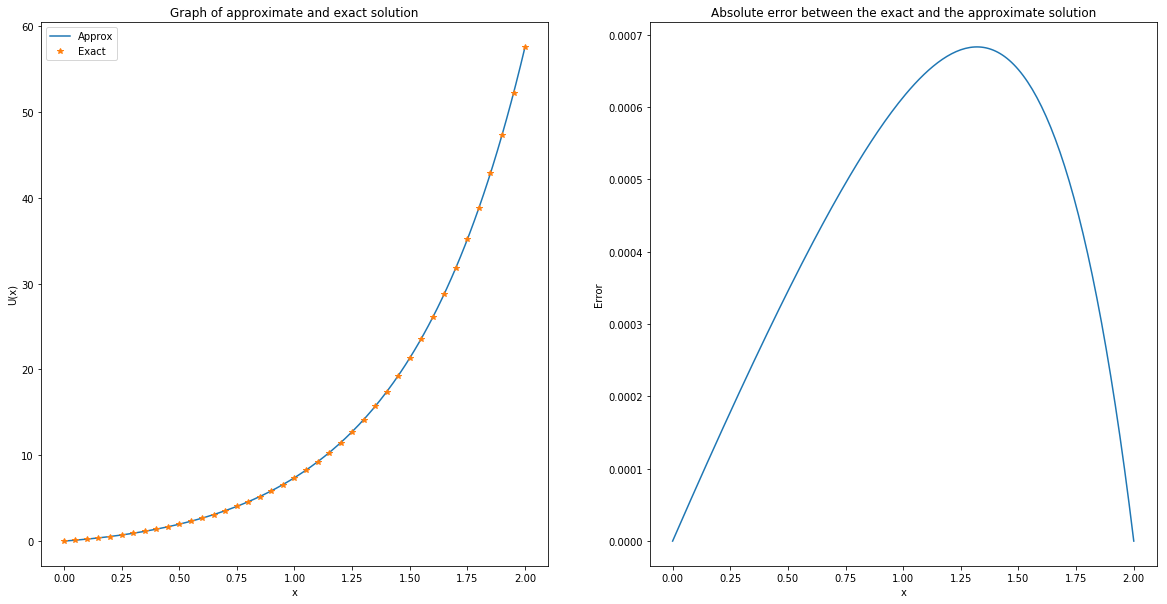

In [42]:
"""
Mark:1.5/1.5
"""

a=0
b=2
h=0.01
N = int((b-a)/h)
x = np.linspace(a,b,N+1)
U_ex = np.exp(2*x)+ x**2 -1
E=abs(U_ap - U_ex)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.plot(x,U_ap)
plt.plot(x[::5],U_ex[::5],'*')
plt.xlabel('x')
plt.ylabel('U(x)')
plt.title('Graph of approximate and exact solution')
plt.legend(['Approx','Exact'])

plt.subplot(1,2,2)
plt.plot(x,E)
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Absolute error between the exact and the approximate solution')
plt.show()
